In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

true_path = '/content/drive/MyDrive/True.csv'
fake_path = '/content/drive/MyDrive/Fake.csv'

true_df = pd.read_csv(true_path)
fake_df = pd.read_csv(fake_path)

In [ ]:
display(true_df)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
display(fake_df)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


# Data Visulization

<ipython-input-5-8fb752d989ab>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="subject", palette="coolwarm", data=true_df).set_title('True News Subject Distribution')


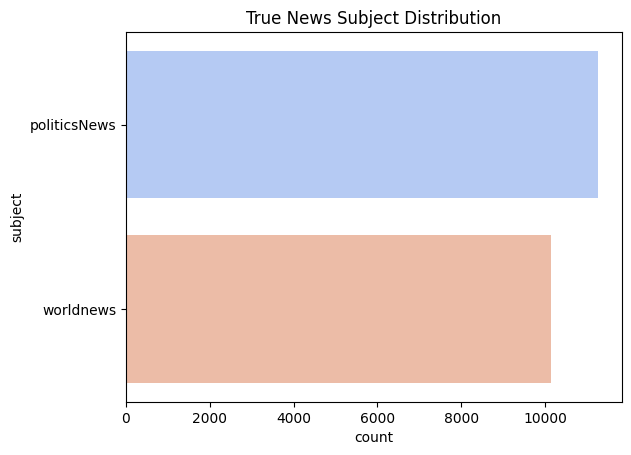

<ipython-input-5-8fb752d989ab>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="subject", palette="coolwarm", data=fake_df).set_title('Fake News Subject Distribution')


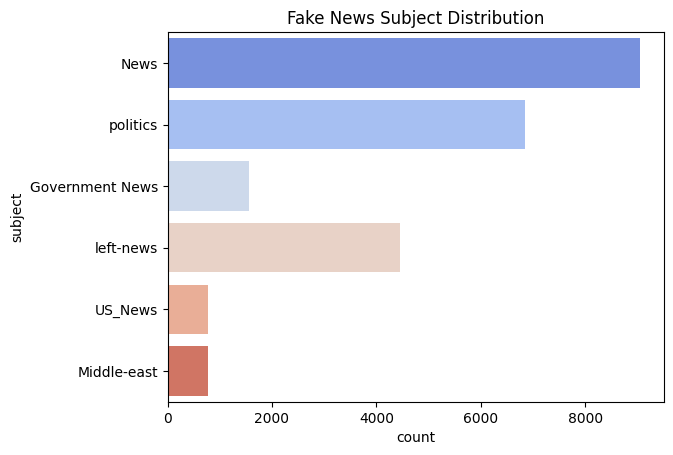

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y="subject", palette="coolwarm", data=true_df).set_title('True News Subject Distribution')
plt.show()

sns.countplot(y="subject", palette="coolwarm", data=fake_df).set_title('Fake News Subject Distribution')
plt.show()

## Real News Word Cloud

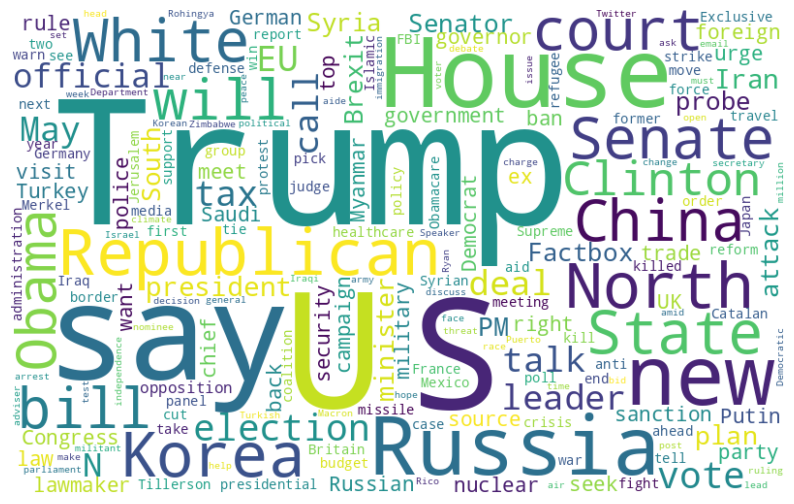

In [ ]:
from wordcloud import WordCloud

real_titles = true_df.title
real_titles_ls = [text for text in real_titles]
# print(alls)
real_all_words = ' '.join(real_titles)
wordcloud_real = WordCloud(background_color='white',
    width= 800, height= 500,
    max_font_size = 180,
    collocations = False).generate(real_all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis("off")
plt.show()

## Fake News Word Cloud

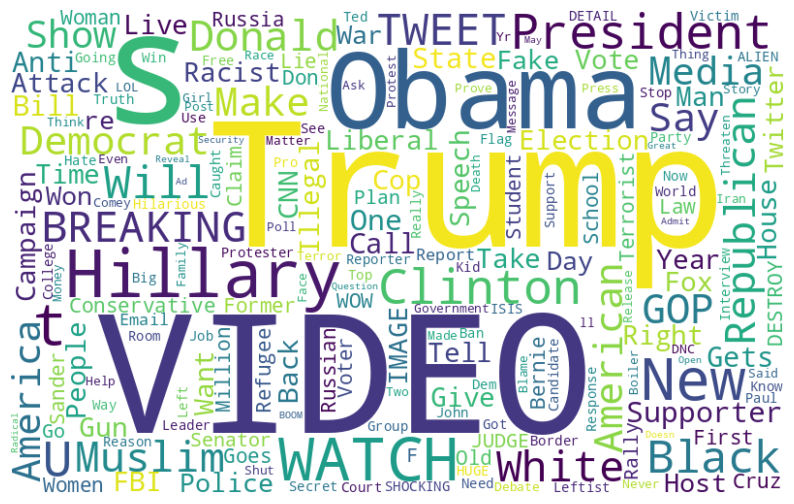

In [ ]:
fake_titles = fake_df.title
fake_titles_ls = [text for text in fake_titles]
# print(alls)
fake_all_words = ' '.join(fake_titles)
wordcloud_fake = WordCloud(background_color='white',
    width= 800, height= 500,
    max_font_size = 180,
    collocations = False).generate(fake_all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis("off")
plt.show()

# Data Preprocessing

## Data Combination

In [ ]:
# Add Labels to both df
true_df['true'] = 1
fake_df['true'] = 0

# Concat
df = pd.concat([true_df, fake_df])
display(df)

,title,text,subject,date,true
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


## Inspect Lengths of News

In [ ]:
titles = [text for text in df.title]

max_len = 0
titles_len = []
for title in titles:
    titles_len.append(len(title.split()))
    max_len = max(len(title.split()), max_len)

print('Number of titles:', len(titles))
print('Max length of the titles:', max_len)
print('Mean length of the titles:', np.mean(titles_len))

Number of titles: 44898
Max length of the titles: 42
Mean length of the titles: 12.453472315025168


<ipython-input-10-48495321f256>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=50)


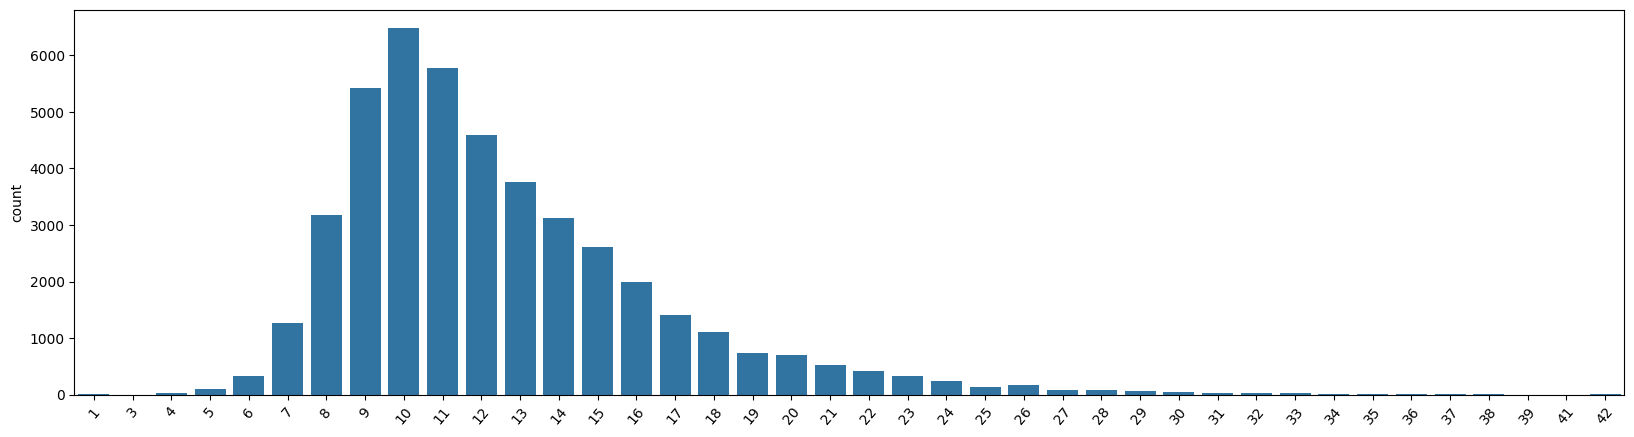

In [ ]:
plt.figure(figsize=(20,5))
g = sns.countplot(x=titles_len)
g.set_xticklabels(g.get_xticklabels(), rotation=50)
plt.show()

In [ ]:
texts = [text for text in df.text]

max_len = 0
texts_len = []
for text in texts:
    texts_len.append(len(text.split()))
    max_len = max(len(text.split()), max_len)

# g = sns.countplot(x=texts_len)
print('Mean length of the texts:', np.mean(texts_len))

Mean length of the texts: 405.28228428883244


## Purify & Shffle the DataFrame

In [ ]:
from sklearn.utils import shuffle

# Purify
df = df.iloc[:,[0, -1]]

# Shuffle
df = shuffle(df).reset_index(drop=True)

display(df)

,title,true
0,Baltimore Teacher Breaks 7-Yr-Old’s Jaw For B...,0
1,Transition Official Stuns MSNBC Anchor When H...,0
2,Republicans Want To Tax Democratic States Mor...,0
3,MARINE VET HAS ‘NO REGRETS’ OVER JAIL TIME For...,0
4,NOT KIDDING: DEMOCRATS Are Calling For Obama T...,0
...,...,...
44893,George Takei Just F*cking HUMILIATED Trump Ov...,0
44894,Trump EXPLODES Because Paul Ryan Won’t Defend...,0
44895,"Paul Manafort, Trump's former campaign chief, ...",1
44896,CHAOS In Washington As Trump Avoids Real Work...,0


## Split Data into Training, Validation, Test

In [ ]:
train_val_df = df.sample(frac = 0.8)
test_df = df.drop(train_val_df.index)

train_df = train_val_df.sample(frac = 0.8)
val_df = train_val_df.drop(train_df.index)

# Reset Index
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

print('trainset size:', train_df.shape)
print('valset size:', val_df.shape)
print('testset size:', test_df.shape)

trainset size: (28734, 2)
valset size: (7184, 2)
testset size: (8980, 2)


## Dataframe to csv

In [ ]:
train_df.to_csv('train.tsv', sep='\t', index=False)
val_df.to_csv('val.tsv', sep='\t', index=False)
test_df.to_csv('test.tsv', sep='\t', index=False)

## Concatenate all dataframe

In [ ]:
df = pd.concat([train_df, val_df, test_df])
df

,title,true
0,Ex-Trump Campaign Manager Gets PUMMELED On CN...,0
1,Boiler Room EP #111 – Build-a-World-Order-Burger,0
2,WATCH JOHN KERRY’S FEAR MONGERING ON IRAN DEAL...,0
3,"German coalition talks stumble on migration, c...",1
4,BELGIUM’S POLITICAL LEADER Michaël Modrikamen ...,0
...,...,...
8975,FOX News Anchor Shepard Smith Finally ‘Comes O...,0
8976,Adele Wants NOTHING To Do With Donald Trump A...,0
8977,WATCH: Chris Cuomo SHREDS Kellyanne Conway Fo...,0
8978,"Amid visa row, Turkey's Justice Ministry cance...",1


## Performing Data Cleaning

In [ ]:
import nltk
# Downloading Stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Obtaining Additional Stopwords From nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [ ]:
# Removing Stopwords And Remove Words With 2 Or Less Characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)

    return result

In [ ]:
import gensim

# Applying The Function To The Dataframe
df['clean'] = df['title'].apply(preprocess)

## Obtaining The Total Words Present In The Dataset

In [ ]:
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)

total_words = len(list(set(list_of_words)))
total_words

19174

## Preparing The Data By Performing Tokenization And Padding

In [ ]:
from nltk import word_tokenize

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer

# Creating A Tokenizer To Tokenize The Words And Create Sequences Of Tokenized Words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(train_df['title'])

train_sequences = tokenizer.texts_to_sequences(train_df['title'])
val_sequences = tokenizer.texts_to_sequences(val_df['title'])
test_sequences = tokenizer.texts_to_sequences(test_df['title'])

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Adding Padding
padded_train = pad_sequences(train_sequences,maxlen = 42, padding = 'post', truncating = 'post')
padded_val = pad_sequences(val_sequences,maxlen = 42, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 42, padding = 'post', truncating = 'post')

# LSTM

## Building And Training LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout, BatchNormalization

## Creating model Using LSTM
embedding_vector_features=40
model=Sequential()
model.add(Embedding(total_words,embedding_vector_features,input_length=20))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
y_train = np.asarray(train_df['true'])
y_val = np.asarray(val_df['true'])

# Training the model
model.fit(padded_train, y_train, batch_size = 64, validation_data=(padded_val, y_val), epochs = 3)

Epoch 1/3
449/449 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7431 - loss: 0.4110 - val_accuracy: 0.9655 - val_loss: 0.0958
Epoch 2/3
449/449 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9798 - loss: 0.0660 - val_accuracy: 0.9697 - val_loss: 0.0882
Epoch 3/3
449/449 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9905 - loss: 0.0331 - val_accuracy: 0.9702 - val_loss: 0.0895


## Assessing Trained Model Performance

281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
LSTM Model Accuracy :  0.5177060133630289
              precision    recall  f1-score   support

           0       0.52      1.00      0.68      4649
           1       0.00      0.00      0.00      4331

    accuracy                           0.52      8980
   macro avg       0.26      0.50      0.34      8980
weighted avg       0.27      0.52      0.35      8980



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


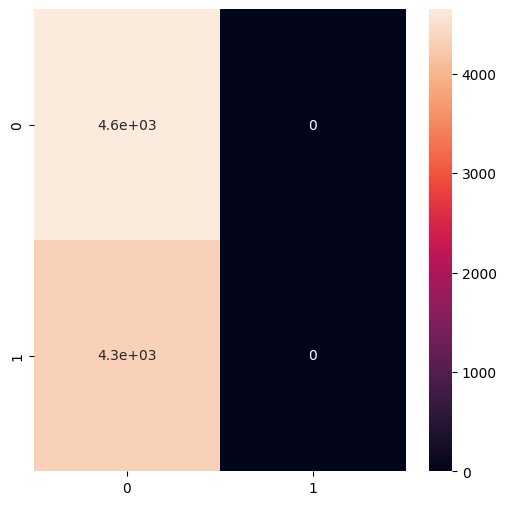

In [ ]:
# Making prediction
prediction = np.argmax(model.predict(padded_test), axis=-1)

# Getting The Accuracy
from sklearn.metrics import accuracy_score
y_test = np.asarray(test_df['true'])

accuracy = accuracy_score(list(y_test), prediction)

print("LSTM Model Accuracy : ", accuracy)


# Getting The Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (6, 6))
sns.heatmap(cm, annot = True)

from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

SVM Model Accuracy:  0.9518930957683742
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      4649
           1       0.94      0.96      0.95      4331

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



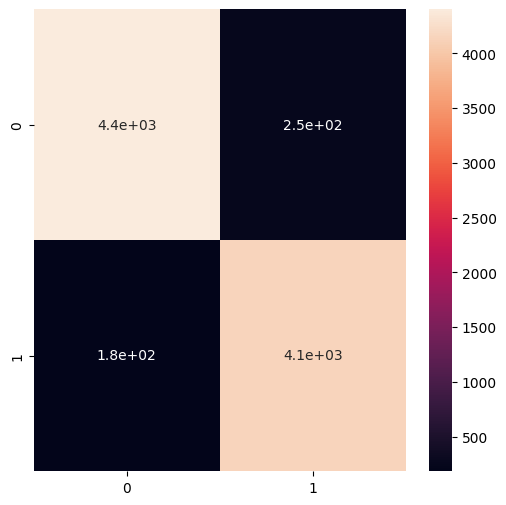

In [ ]:
# SVM Model Implementation

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(train_df['title'])
X_val_tfidf = vectorizer.transform(val_df['title'])
X_test_tfidf = vectorizer.transform(test_df['title'])

# SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, train_df['true'])

# Predictions
svm_predictions = svm_model.predict(X_test_tfidf)

# Accuracy
accuracy = accuracy_score(test_df['true'], svm_predictions)
print("SVM Model Accuracy: ", accuracy)

# Confusion Matrix
cm = confusion_matrix(test_df['true'], svm_predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True)

# Classification Report
print(classification_report(test_df['true'], svm_predictions))


Naive Bayes Model Accuracy:  0.9326280623608018
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      4649
           1       0.94      0.92      0.93      4331

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



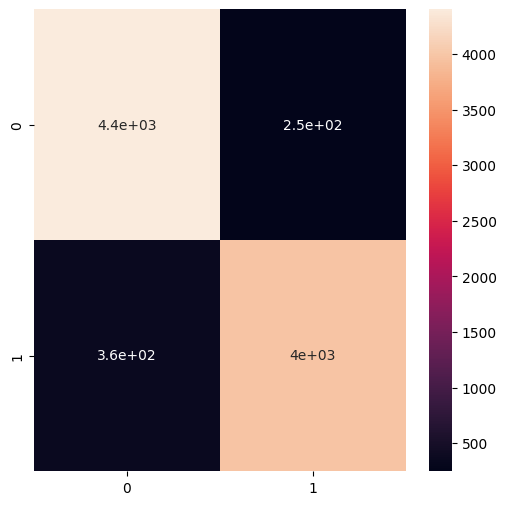

In [ ]:
# Naive Bayes Model Implementation

from sklearn.naive_bayes import MultinomialNB

# Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, train_df['true'])

# Predictions
nb_predictions = nb_model.predict(X_test_tfidf)

# Accuracy
accuracy = accuracy_score(test_df['true'], nb_predictions)
print("Naive Bayes Model Accuracy: ", accuracy)

# Confusion Matrix
cm = confusion_matrix(test_df['true'], nb_predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True)

# Classification Report
print(classification_report(test_df['true'], nb_predictions))


Random Forest Model Accuracy:  0.9439866369710468
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      4649
           1       0.94      0.94      0.94      4331

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



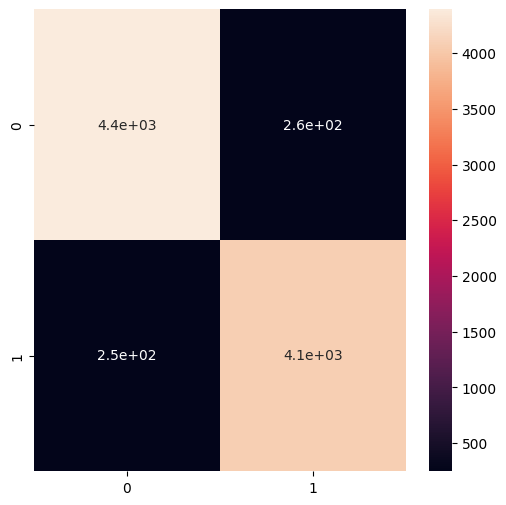

In [ ]:
# Random Forest Model Implementation

from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, train_df['true'])

# Predictions
rf_predictions = rf_model.predict(X_test_tfidf)

# Accuracy
accuracy = accuracy_score(test_df['true'], rf_predictions)
print("Random Forest Model Accuracy: ", accuracy)

# Confusion Matrix
cm = confusion_matrix(test_df['true'], rf_predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True)

# Classification Report
print(classification_report(test_df['true'], rf_predictions))


# BERT

In [ ]:
!pip install transformers

import torch
from transformers import BertTokenizer

In [ ]:
PRETRAINED_MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(PRETRAINED_MODEL_NAME)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

## Load Dataset Class

In [ ]:
from torch.utils.data import Dataset

class FakeNewsDataset(Dataset):
    def __init__(self, mode, tokenizer):
        assert mode in ['train', 'val', 'test']
        self.mode = mode
        self.df = pd.read_csv(mode + '.tsv', sep='\t').fillna("")
        self.len = len(self.df)
        self.tokenizer = tokenizer  # BERT tokenizer

    def __getitem__(self, idx):
        if self.mode == 'test':
            statement, label = self.df.iloc[idx, :].values
            label_tensor = torch.tensor(label)
        else:
            statement, label = self.df.iloc[idx, :].values
            label_tensor = torch.tensor(label)


        word_pieces = ['[CLS]']
        statement = self.tokenizer.tokenize(statement)
        word_pieces += statement + ['[SEP]']
        len_st = len(word_pieces)

        ids = self.tokenizer.convert_tokens_to_ids(word_pieces)
        tokens_tensor = torch.tensor(ids)


        segments_tensor = torch.tensor([0] * len_st, dtype=torch.long)

        return (tokens_tensor, segments_tensor, label_tensor)

    def __len__(self):
        return self.len


# Initialize Datasets for Transformation
trainset = FakeNewsDataset('train', tokenizer=tokenizer)
valset = FakeNewsDataset('val', tokenizer=tokenizer)
testset = FakeNewsDataset('test', tokenizer=tokenizer)

print('trainset size:' ,trainset.__len__())
print('valset size:',valset.__len__())
print('testset size: ',testset.__len__())

trainset size: 28734
valset size: 7184
testset size:  8980


## Sampling and Observing Tensors

In [ ]:
sample_idx = 0

statement, label = trainset.df.iloc[sample_idx].values
tokens_tensor, segments_tensor, label_tensor = trainset[sample_idx]
tokens = tokenizer.convert_ids_to_tokens(tokens_tensor.tolist())
combined_text = " ".join(tokens)
print(f"""
original_statement:
{statement}

tokens:
{tokens}

label: {label}

--------------------

tokens_tensor:
{tokens_tensor}

segments_tensor:
{segments_tensor}

label_tensor:
{label_tensor}

""")


original_statement:
 Ex-Trump Campaign Manager Gets PUMMELED On CNN For Suggesting Trump Was An Expert On Brexit (VIDEO)

tokens:
['[CLS]', 'ex', '-', 'trump', 'campaign', 'manager', 'gets', 'pu', '##mmel', '##ed', 'on', 'cnn', 'for', 'suggesting', 'trump', 'was', 'an', 'expert', 'on', 'br', '##ex', '##it', '(', 'video', ')', '[SEP]']

label: 0

--------------------

tokens_tensor:
tensor([  101,  4654,  1011,  8398,  3049,  3208,  4152, 16405, 29033,  2098,
         2006, 13229,  2005,  9104,  8398,  2001,  2019,  6739,  2006,  7987,
        10288,  4183,  1006,  2678,  1007,   102])

segments_tensor:
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])

label_tensor:
0




## Reforming the Dataset to Fit the Model

In [ ]:
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

def create_mini_batch(samples):
    tokens_tensors = [s[0] for s in samples]
    segments_tensors = [s[1] for s in samples]

    if samples[0][2] is not None:
        label_ids = torch.stack([s[2] for s in samples])
    else:
        label_ids = None

    # Zero Padding
    tokens_tensors = pad_sequence(tokens_tensors, batch_first=True)
    segments_tensors = pad_sequence(segments_tensors, batch_first=True)


    masks_tensors = torch.zeros(tokens_tensors.shape, dtype=torch.long)
    masks_tensors = masks_tensors.masked_fill(tokens_tensors != 0, 1)

    return tokens_tensors, segments_tensors, masks_tensors, label_ids

BATCH_SIZE = 16
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, collate_fn=create_mini_batch)
valloader = DataLoader(valset, batch_size=BATCH_SIZE, collate_fn=create_mini_batch)
testloader = DataLoader(testset, batch_size=BATCH_SIZE,collate_fn=create_mini_batch)

In [ ]:
data = next(iter(trainloader))

tokens_tensors, segments_tensors, masks_tensors, label_ids = data

print(f"""
tokens_tensors.shape   = {tokens_tensors.shape}
{tokens_tensors}
------------------------
segments_tensors.shape = {segments_tensors.shape}
{segments_tensors}
------------------------
masks_tensors.shape    = {masks_tensors.shape}
{masks_tensors}
------------------------
label_ids.shape        = {label_ids.shape}
{label_ids}
""")


tokens_tensors.shape   = torch.Size([16, 34])
tensor([[  101,  4654,  1011,  8398,  3049,  3208,  4152, 16405, 29033,  2098,
          2006, 13229,  2005,  9104,  8398,  2001,  2019,  6739,  2006,  7987,
         10288,  4183,  1006,  2678,  1007,   102,     0,     0,     0,     0,
             0,     0,     0,     0],
        [  101, 15635,  2282,  4958,  1001, 11118,  1516,  3857,  1011,  1037,
          1011,  2088,  1011,  2344,  1011, 15890,   102,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0],
        [  101,  3422,  2198, 11260,  1521,  1055,  3571, 12256,  4590,  2075,
          2006,  4238,  3066,  2490,  1024,  1523, 13769,  1998, 15011, 13494,
          1524,  2065,  6380,  2011,  3519,   102,     0,     0,     0,     0,
             0,     0,     0,     0],
        [  101,  2446,  6056,  7566, 21811,  2006,  9230,  1010,  4785,   102,
             0,     0,     0,     0,     0,     0

## Model Construction

In [ ]:
from transformers import BertForSequenceClassification
from IPython.display import display, clear_output

PRETRAINED_MODEL_NAME = "bert-base-uncased"
NUM_LABELS = 2

model = BertForSequenceClassification.from_pretrained(
    PRETRAINED_MODEL_NAME, num_labels=NUM_LABELS)

clear_output()

print("""
name             module
-----------------------""")
for name, module in model.named_children():
    if name == "bert":
        for n, _ in module.named_children():
            print(f"{name}:{n}")
    else:
        print("{:16} {}".format(name, module))


name             module
-----------------------
bert:embeddings
bert:encoder
bert:pooler
dropout          Dropout(p=0.1, inplace=False)
classifier       Linear(in_features=768, out_features=2, bias=True)


In [ ]:
model.config

BertConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.47.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

# Fine-Tuning of BERT

In [ ]:
# %%time
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device:", device)
model = model.to(device)

model.train()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
NUM_EPOCHS = 3

for epoch in range(NUM_EPOCHS):
    train_loss = 0.0
    train_acc = 0.0

    loop = tqdm(trainloader)
    for batch_idx, data in enumerate(loop):
        tokens_tensors, segments_tensors, masks_tensors, labels = [t.to(device) for t in data]


        optimizer.zero_grad()

        outputs = model(input_ids=tokens_tensors,
                        token_type_ids=segments_tensors,
                        attention_mask=masks_tensors,
                        labels=labels)

        loss = outputs[0]
        loss.backward()
        optimizer.step()

        logits = outputs[1]
        _, pred = torch.max(logits.data, 1)
        train_acc = accuracy_score(pred.cpu().tolist() , labels.cpu().tolist())

        # batch loss
        train_loss += loss.item()

        # if batch_idx == len(trainloader)-1:
        #     _, acc = get_predictions(model, trainloader, compute_acc=True)

        loop.set_description(f"Epoch [{epoch+1}/{NUM_EPOCHS}]")
        loop.set_postfix(acc = train_acc, loss = train_loss)

device: cuda:0


  0%|          | 0/1796 [00:00<?, ?it/s]

  0%|          | 0/1796 [00:00<?, ?it/s]

  0%|          | 0/1796 [00:00<?, ?it/s]

## Save Model

In [ ]:
torch.save(model, './best_model.pth')
print('Model saved!')

Model saved!


## Load Model

In [ ]:
# model = torch.load('./best_model.pth')
# model = model.to(device)

# Test

[[0.96580241 0.00221926]
 [0.03419759 0.99778074]]
Acc:  0.9818485523385301


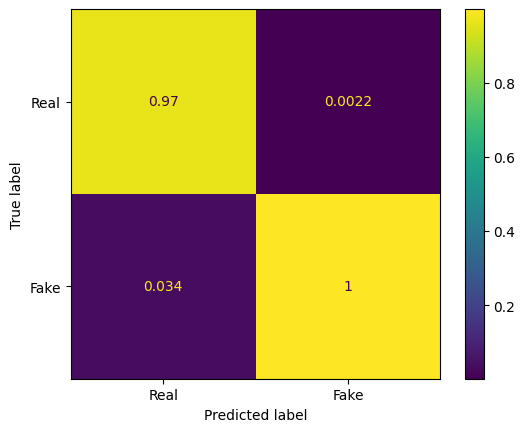

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

true=[]
predictions=[]
with torch.no_grad():
    model.eval()
    for data in testloader:
        if next(model.parameters()).is_cuda:
            data = [t.to(device) for t in data if t is not None]

        tokens_tensors, segments_tensors, masks_tensors = data[:3]
        test_outputs = model(input_ids=tokens_tensors,
                    token_type_ids=segments_tensors,
                    attention_mask=masks_tensors)

        logits = test_outputs[0]
        _, pred = torch.max(logits.data, 1)

        labels = data[3]
        true.extend(labels.cpu().tolist())
        predictions.extend(pred.cpu().tolist())


cm = confusion_matrix(true, predictions, labels=[1, 0], normalize='pred')
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])
disp.plot()

print('Acc: ', accuracy_score(predictions,true))

In [ ]:
df = pd.DataFrame({"pred_label": predictions})

df_pred = pd.concat([testset.df.loc[:, ['title']],
                          testset.df.loc[:, ['true']],
                          df.loc[:, 'pred_label']], axis=1)
# df_pred.to_csv('bert_1_prec_training_samples.csv', index=False)
df_pred

,title,true,pred_label
0,"Hurricane Maria now Category 4, Puerto Rico la...",1,1
1,BREAKING: WHY DID MASSACHUSETTS OFFICIALS WAIT...,0,0
2,Strike called in Bangladesh over power price r...,1,1
3,The Amount Of People Shot This Year So Far By...,0,0
4,HUGE Spending Agreement Reached: GOP Caves On ...,0,0
...,...,...,...
8975,FOX News Anchor Shepard Smith Finally ‘Comes O...,0,0
8976,Adele Wants NOTHING To Do With Donald Trump A...,0,0
8977,WATCH: Chris Cuomo SHREDS Kellyanne Conway Fo...,0,0
8978,"Amid visa row, Turkey's Justice Ministry cance...",1,1


In [ ]:
print(classification_report(df_pred.true, df_pred.pred_label))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      4649
           1       0.97      1.00      0.98      4331

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



## Insight on Wrong Classification

<ipython-input-43-4fe9ad7547fc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="true", palette="coolwarm", data=wrong_df).set_title('Wrong Classification Result Real/Fake Distribution')


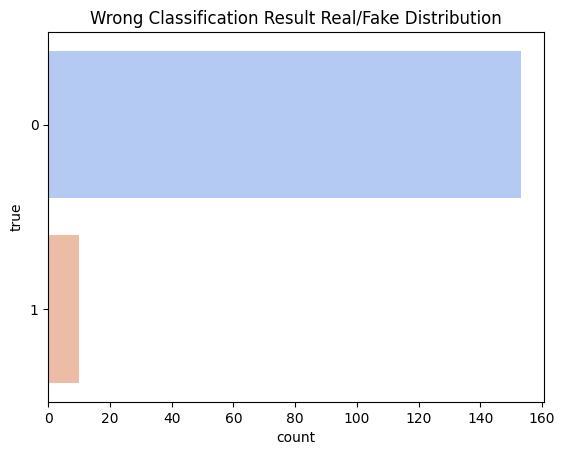

In [ ]:
wrong_df = df_pred[df_pred.true != df_pred.pred_label]
sns.countplot(y="true", palette="coolwarm", data=wrong_df).set_title('Wrong Classification Result Real/Fake Distribution')
plt.show()

In [ ]:
wrong_titles = df_pred[df_pred.true != df_pred.pred_label].title.values
wrong_titles

array(['TOP 10 TWEETS From Democrat Debate',
       ' Idaho Republicans Push Bill To Let Teachers Use Bible In Science Class',
       ' First Supreme Court 4-4 Tie Screws Republicans HARD',
       ' Chinese State Media Calls Trump Out After He Gives One China Policy The Middle Finger',
       'NEW ORLEANS Bans Incredible Civil War Monuments',
       ' Former Ambassador Accuses Trump Of Violating Constitution Every Time A Diplomat Visits',
       'BERNIE SUES To Allow 17 Year Olds To Vote',
       'GUNFIGHT ERUPTS: Muslim Migrants Fight To Keep Minority Christians Out Of Camp in Northern France',
       'Trump Jr. tweet likening Syrian refugees to poisoned Skittles irks candy maker',
       'TOP 10 TWEETS From Democrat Debate',
       ' Sources: President Obama Set To Make Official 2016 Endorsement This Week',
       ' Trump Legally Declares His Inauguration A Historic Day',
       ' According To Employees, Trump Often Spied On Mar-A-Lago’s Guest’s Phone Calls',
       ' Thanks, Obama: 

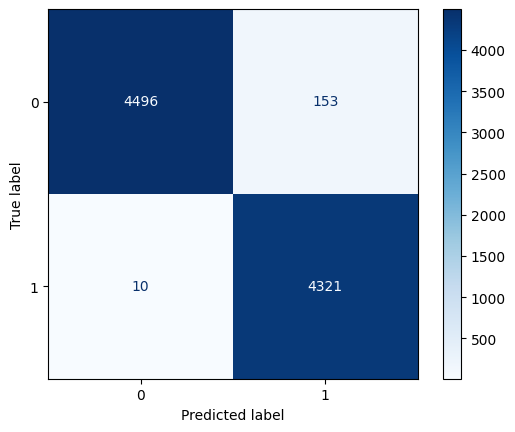

Accuracy: 98.18%


In [ ]:
# Test

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

true = []
predictions = []
with torch.no_grad():
    model.eval()
    for data in testloader:
        if next(model.parameters()).is_cuda:
            data = [t.to(device) for t in data if t is not None]

        tokens_tensors, segments_tensors, masks_tensors = data[:3]
        test_outputs = model(input_ids=tokens_tensors,
                             token_type_ids=segments_tensors,
                             attention_mask=masks_tensors)

        logits = test_outputs[0]

        _, preds = torch.max(logits, dim=1)  # Get predicted class labels
        # Ensure true labels are added as individual elements, not arrays
        true.extend(data[3].cpu().numpy().tolist())  # True labels
        predictions.extend(preds.cpu().numpy().tolist())  # Predicted labels

# Confusion Matrix and Accuracy
cm = confusion_matrix(true, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

accuracy = accuracy_score(true, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

In [ ]:
import torch
from transformers import BertTokenizer
from torch.utils.data import DataLoader
from transformers import BertForSequenceClassification
from torch.nn.utils.rnn import pad_sequence  # Import pad_sequence

# Load the saved model
model = torch.load('/content/best_model.pth')
model = model.to(device)

# Load the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Sample text input for prediction
sample_texts = ["This is a sample news article about politics.", "Fake news is spreading on social media."]

# Tokenize the input
def preprocess_text(texts):
    word_pieces = ['[CLS]']
    tokenized_texts = [tokenizer.tokenize(text) for text in texts]
    word_pieces += [item for sublist in tokenized_texts for item in sublist] + ['[SEP]']
    input_ids = tokenizer.convert_tokens_to_ids(word_pieces)
    return input_ids

input_ids = [preprocess_text([text]) for text in sample_texts]

# Pad sequences to the same length
input_ids = pad_sequence([torch.tensor(ids) for ids in input_ids], batch_first=True, padding_value=0).to(device) # Pad sequences

# Prepare DataLoader for prediction
class PredictionDataset(torch.utils.data.Dataset):
    def __init__(self, input_ids):
        self.input_ids = input_ids

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx]

predict_dataset = PredictionDataset(input_ids)
predict_loader = DataLoader(predict_dataset, batch_size=1)

# Make predictions
model.eval()
predictions = []
with torch.no_grad():
    for data in predict_loader:
        tokens_tensor = data.to(device)
        outputs = model(input_ids=tokens_tensor)
        logits = outputs[0]
        _, predicted_class = torch.max(logits, dim=1)
        predictions.append(predicted_class.cpu().item())

# Display the predictions
for i, text in enumerate(sample_texts):
    print(f"Text: {text}")
    print(f"Prediction: {'Fake' if predictions[i] == 0 else 'True'}\n")

<ipython-input-46-01fd70c5dc5d>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('/content/best_model.pth')
We strongly recommend passing in an `attention

Text: This is a sample news article about politics.
Prediction: Fake

Text: Fake news is spreading on social media.
Prediction: Fake



**Building Streamlit app**

In [ ]:
!pip install streamlit


ERROR: Could not find a version that satisfies the requirement localtunnel (from versions: none)
ERROR: No matching distribution found for localtunnel


In [ ]:
%%writefile app.py
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import streamlit as st

# Set the device (GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the entire saved model (no need for state_dict here)
model = torch.load('/content/best_model.pth')
model = model.to(device)

# Load the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Streamlit App UI
st.title('Fake News Detection')
st.write("Enter a news article or text below:")

# Text input box
input_text = st.text_area("Input Text", "This is a sample news article about politics.")

if st.button('Predict'):
    # Tokenize the input text
    inputs = tokenizer(input_text, padding=True, truncation=True, return_tensors="pt", max_length=512)
    input_ids = inputs['input_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)

    # Make predictions
    model.eval()
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        _, predicted_class = torch.max(logits, dim=1)
        prediction = 'Fake' if predicted_class.item() == 0 else 'True'

    # Display prediction
    st.write(f"Prediction: {prediction}")

Overwriting app.py


In [ ]:
! pip install streamlit -q

In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.87.22.9


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

⠙

⠹⠸⠼
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.2:8501
  External URL: http://34.87.22.9:8501

⠴⠦your url is: https://great-onions-sip.loca.lt
2024-12-28 10:09:29.993033: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-28 10:09:30.017797: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-28 10:09:30.025127: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-28 10:09:31.388799: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/content/app.py:9

In [1]:
!pip install flask transformers torch


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
